# Introduction to Pandas

### What is pandas?

- A Python package for **data manipulation and analysis**
- **Simplifies common tasks** carried out with data
- **Fast and efficient** handling of large amounts of data

### Pandas Use Cases

---

- Cleaning data/munging
- Exploratory data analysis
- Structuring data for plots or tabular display
- Joining disparate sources
- Modeling
- Filtering, extracting, or transforming


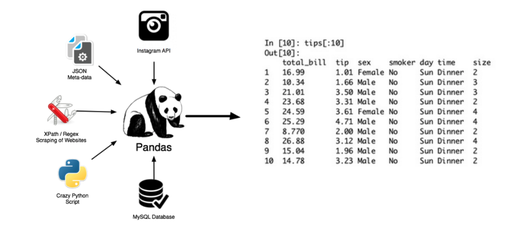

### Overview of functionality

- **Load data** from numerous type of files and online sources
- **Filtering**, **sorting**, **editing** and **processing** of data
- **Joining** and **aggregation** of datasets
- Tools for **time series** and **statistical analysis**
- Display of data in **tables** and **charts**
- Integrate with `matplotlib`

### Getting started

Importing pandas

In [ ]:
import pandas as pd

The pandas package is imported and given an **alias** of `pd`  

#### Reading a CSV file

In [ ]:
df = pd.read_csv('data/titanic.csv')

- The pandas `.read_csv()` **function** is called
- It has only one required **parameter**, which is the location of a CSV (comma-separated values) file
- `'data/titanic.csv'` is provided as the **argument** for this parameter
- The result (which is a pandas **DataFrame** object) is assigned to a variable called `df`

## Getting an overview of the dataset
> _Typical problems that arise when working with new data sets include_:
> - Missing values.
> - Unexpected types (string/object instead of int/float).
> - Dirty data (commas, dollar signs, unexpected characters, etc.).
> - Blank values that are actually "non-null" or single white-space characters.

In [ ]:
df.head()

pandas DataFrame objects (such as `df` which was just created) have numerous associated methods:
- `.head()` is an example of one of these; by default it will return the **top five rows** of the DataFrame
- This method takes **one optional parameter**, which is the **number of rows** to display
- `.tail()` works in the same way, except that is shows the last rows in the DataFrame
- `.sample(5)` allows you to sample rows at random

## Examining Your Data With `.info()`

---
When getting acquainted with a new data set, `.info()` should be **the first thing** you examine.

`.info()` is a function available on every **DataFrame** object. It provides information about:

- The name of the column/variable attribute
- The type of index (RangeIndex is default)
- The count of non-null values by column/attribute
- The type of data contained in the column/attribute
- The unique counts of **dtypes** (`pandas` data types)
- The memory usage of the data set

In [ ]:
df.info()

- The `.info()` method allows us to understand more about the dataset; how many values there are and what might be missing
- Notice it tells us about `dtypes`; these are the **pandas data types** for each column as interpreted by pandas when reading the CSV file

## Summarizing Data with `.describe()`

---

The ```.describe()``` function is useful for taking a quick look at your data. It returns some basic descriptive statistics.


In [ ]:
df.describe()

For our example, use the ```.describe()``` function only on the ```survived``` column.

In [ ]:
df.survived.describe()

You can also use it on multiple columns, such as ```survived``` and ```pclass```.

In [ ]:
df[['survived', 'pclass']].describe()

```.describe()``` gives us the following statistics:

- **Count**, the number of values contained in a column
- **Mean**, the average of the values in the column
- **Std**, the standard deviation
- **Min**, the minimum value
- **25%**, the 25th percentile of the values
- **50%**, the 50th percentile of the values (which is the equivalent to the median)
- **75%**, the 75th percentile of the values
- **Max**, the maximal value

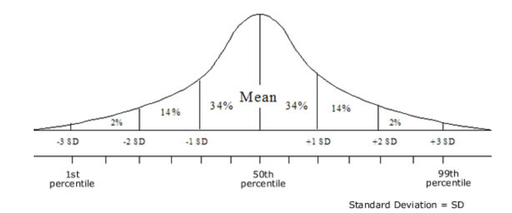

**HINT** - Try typing df.describe() and hit `shift + tab`

In [ ]:
df.describe()

##### What is the below code showing? 

In [ ]:
df.describe(include='O')

In [ ]:
df.shape

The `.shape` **attribute** of a DataFrame gives us the number of rows and columns it contains

As you can see, we have 891 rows and 15 columns, so we can consider this a small data set.

In [ ]:
rows = df.shape[0]
rows

In [ ]:
columns = df.shape[1]
columns

In [ ]:
df.columns

In [ ]:
df.survived.head(3)

In [ ]:
df['survived'].head(3)

In [ ]:
df[['survived']].head(3)

In [ ]:
df[['survived','pclass']].head()

### DataFrame vs. Series

---

There is an important difference between using a list of strings versus only using a string with a column's name: When you use a list containing the string, it returns another **DataFrame**. But, when you only use the string, it returns a `pandas` **Series** object.

In [ ]:
print(df['survived'].head(3))
type(df['survived'])

In [ ]:
print(df[['survived']].head(3))
type(df[['survived']])

### What's a DataFrame?
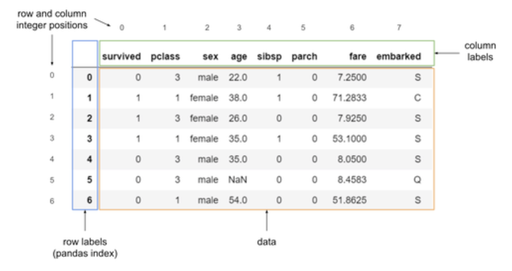

- A two-dimensional **tabular data structure** made up of **rows** and **columns** of **data**
- Rows and columns have associated **labels** to enable data selection and filtering

- Each **row** represents an **entry** (or 'case' or 'record') of values associated with one another
- Values in a given **column** are of the **same pandas datatype** (although note that the pandas `object` datatype can accomodate numerous Python datatypes, such as lists, dictionaries etc)

### pandas data types

 - **object** - used for strings, or if the column contains a mix of data types
 - **int64** - used for integers ('64' relates to memory usage)
 - **float64** - used for floats, or where the column has both integers and NaN values
 - **datetime64** / **timedelta** - time-based values
 - **bool** - booleans, i.e. True or False
 
### pandas missing values
 - **NaN** is used to indicate missing values in most instances, and is supported by the `float` datatype
 - **NaT** is used to indicate missing values where a `datetime` object may have been expected

In [ ]:
df.dtypes

## Jupyter Exercise 

Part 1: Importing, examining, and updating values in a dataset

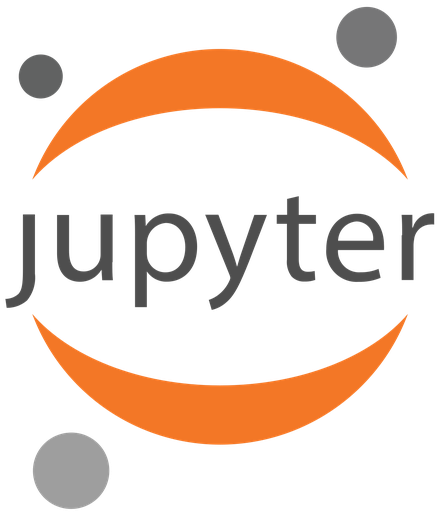

Open `intro-pandas-workbook1.ipynb`

## Retrieving specific data from a DataFrame

This is known as **indexing** in pandas, and can be done using:
- **position**: zero-based integers for row  and column location
- **labels**: row labels (numeric by default) and column names

### The DataFrame index

- The row labels (which can be numeric or text-based) are known as the **index** of the DataFrame
- When a DataFrame is created, pandas by default creates an integer-based index, called a **RangeIndex**
- The `.index` attribute has information about the index of the DataFrame

In [ ]:
df.index

#### Use `.iloc[]` for position-based indexing

In [ ]:
df.iloc[0:2, 0:4]

- Note the **[brackets]** rather than (parentheses)
- The syntax is `[rows,columns]`, where `rows` and `columns` can be **either single values or ranges**
- Ranges work in the same manner as Python lists (0:3 returns three elements, from positions 0, 1 and 2)

In [ ]:
df.iloc[0:2]

- If only a single value or single range is provided, all columns for the given rows will be returned (unless preceeded by `:,`, in which case all rows for the given column(s) would be returned)

In [ ]:
df.iloc[1000:1002]

- If the index is not found or out of range, an empty DataFrame will be returned (rather than an error message)

In [ ]:
df.iloc[0].head()

- Explicitly requesting a specific single row or column will return a pandas Series rather than a DataFrame

#### Use `.loc[]` for label-based indexing

In [ ]:
df.loc[0:3, ['alone','age', 'sex']]

- In this instance we could have used `.iloc` instead of `.loc`, because the position-based and label-based row indexes are equivalent
- If the row index was text-based (for example, passenger names), we would need to use `.loc`

In [ ]:
df.loc[:, 'age'].head()

- As with `.iloc()`, we can provide a pair of values (or a pair of groups of values), in the format `[rows,columns]` 
- Providing only a single value or value group will result in indexing only by row, with all columns being returned
- Groups of values can be provided as a [list], (tuple), or {set}; if a set is provided, the original column order will be retained in the output

- Note how `0:3` is interpreted differently here, in that this refers to the **labels** of the row index rather than the **position**, and that row `3` is included, whereas in the positional syntax (and usual Python list syntax) this would not be the case.

- **label-based indexing** (`.loc`) is **more robust** for looking up data, in that changes to the order or presence of rows or columns will not result in the wrong data being returned

## Updating values found using indexing

- We can use these indexing methods to both **get** (i.e. retrieve values) and **set** (i.e. add or modify values)

#### An example

In [ ]:
deck_df = df.copy()
deck_df.loc[0, 'deck'] = 'G'
deck_df.head(2)

```python
deck_df = df.copy()
```
    
- We created a **copy** of the original DataFrame, so that our modifications do not affect it

```python
deck_df.loc[0, 'deck'] = 'G'
```

- We used label-based indexing to locate a specific **cell** and assign the value `G` to it

- Using `deck_df = df` would have meant that subsequent modifications made to the data in `deck_df` also affected `df`
- This is due to the way pandas works, sometimes creating a **view** of the original DataFrame rather than a **copy** of it
- The rules behind when and why pandas creates views or copies are quite complex; if in doubt, consider using `.copy()`

## Jupyter Exercise 

Part 1: Importing, examining, and updating values in a dataset

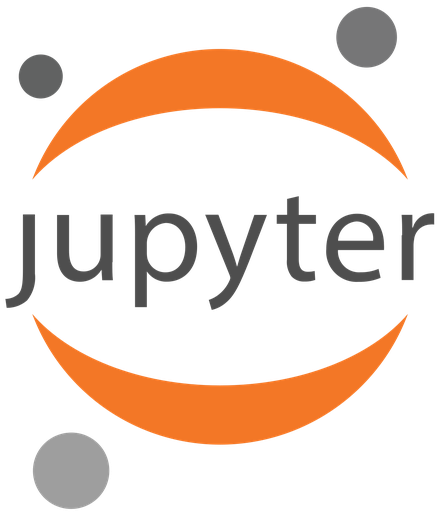

Open `intro-pandas-workbook2.ipynb`